# 1) Resumo

---
# 2) Pre-analise

## 2.1) Importando libs

In [1]:
import pandas as pd
#
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
#
import matplotlib.pyplot as plt
#
import numpy as np
#
from scipy.stats import uniform

## 2.2) Minhas Funções

In [2]:
import sys
sys.path.insert(1, "../../")

from src.plota_graficos import plota_treino_teste_auc
from src.ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv,\
                   treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split 

from src.info import proporcao_y, porcentagem_teste_treino_val, resultados_treinamento

---
# 3) Lendo os dados

In [3]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_sem_coor_acima_do_valor_de_corte.csv"

dados_com_corte = pd.read_csv(path)

dados_com_corte.head(n=5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,ICU
0,1,0.111111,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-0.247863,1
1,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.435897,1
2,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-0.299145,0
3,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-0.076923,0
4,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.884337,-1.000000,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.247863,0


In [4]:
dados_com_corte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE_ABOVE65                   351 non-null    int64  
 1   AGE_PERCENTIL                 351 non-null    float64
 2   GENDER                        351 non-null    int64  
 3   DISEASE GROUPING 1            351 non-null    float64
 4   DISEASE GROUPING 2            351 non-null    float64
 5   DISEASE GROUPING 3            351 non-null    float64
 6   DISEASE GROUPING 4            351 non-null    float64
 7   DISEASE GROUPING 5            351 non-null    float64
 8   DISEASE GROUPING 6            351 non-null    float64
 9   HTN                           351 non-null    float64
 10  IMMUNOCOMPROMISED             351 non-null    float64
 11  OTHER                         351 non-null    float64
 12  ALBUMIN_MEDIAN                351 non-null    float64
 13  BE_AR

In [5]:
dados_com_corte.describe()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.458689,-0.046534,0.381766,0.108262,0.022792,0.091168,0.019943,0.128205,0.045584,0.196581,...,-0.841746,-0.960159,-0.045990,-0.318411,-0.240403,-0.468207,0.097772,0.760029,-0.313074,0.461538
std,0.499002,0.640366,0.486513,0.311155,0.149453,0.288259,0.140004,0.334795,0.208879,0.397980,...,0.135197,0.098682,0.253692,0.274796,0.278347,0.213326,0.272230,0.116880,0.185592,0.499230
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.971084,-1.000000,-0.654321,-0.938462,-0.823899,-0.954802,-0.571429,0.263158,-0.760684,0.000000
25%,0.000000,-0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.898795,-0.983811,-0.185185,-0.538462,-0.415094,-0.593220,-0.107143,0.684211,-0.418803,0.000000
50%,0.000000,-0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.874699,-0.978029,-0.037037,-0.369231,-0.283019,-0.525424,0.071429,0.789474,-0.299145,0.000000
75%,1.000000,0.555556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.821687,-0.971784,0.086420,-0.153846,-0.094340,-0.389831,0.250000,0.842105,-0.213675,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.513241,0.604938,0.553846,1.000000,0.830508,0.964286,1.000000,0.487179,1.000000


In [6]:
x_cv, x_val, y_cv, y_val = cv_val_split(dados_com_corte, p_val = .15)

In [7]:
proporcao_y(dados_com_corte['ICU'])
proporcao_y(y_val)
proporcao_y(y_cv )

Proporcao do ICU
Campo 0 ->  53.85%
Campo 1 ->  46.15%
Proporcao do ICU
Campo 0 ->  54.72%
Campo 1 ->  45.28%
Proporcao do ICU
Campo 0 ->  53.69%
Campo 1 ->  46.31%


In [8]:
porcentagem_teste_treino_val(dados_com_corte['ICU'], y_val, y_cv)

Número total de entradas                         : 351
Número total de entradas para validacao          : 53
Número total de entradas para o Cross Validation : 298


# 4) Modelo de ML

## 4.1) Regreção logistica

In [11]:
modelo = DummyClassifier()

parameters = {'strategy' : ['stratified', 'most_frequent', 'prior', 'uniform']}

resultados, melhor_modelo_dummy, melhores_hyperparametros  = treina_modelo_grid_search_cv(modelo,
                                                                                      x_cv,
                                                                                      y_cv,
                                                                                      parameters,
                                                                                      n_splits=5,
                                                                                      n_repeats=10,
                                                                                      seed=14715)

resultados_treinamento(resultados, melhor_modelo_dummy, melhores_hyperparametros)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
melhores hyperparametros : {'strategy': 'most_frequent'}
Melhor modelo            : DummyClassifier(strategy='most_frequent')


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'strategy': 'stratified'},0.496227,0.504283,0.06588,0.034108,0.001879,0.000621,0.002478,0.000699,4
1,{'strategy': 'most_frequent'},0.500000,0.500000,0.00000,0.000000,0.001798,0.000563,0.002429,0.000762,1
2,{'strategy': 'prior'},0.500000,0.500000,0.00000,0.000000,0.001919,0.000483,0.002338,0.000514,1
3,{'strategy': 'uniform'},0.500000,0.500000,0.00000,0.000000,0.001799,0.000447,0.002398,0.000529,1


## 4.1) Regreção logistica

> Aqui foi usado **RandomizedSearchCV** com **20** iterações. O único hyperparametro procurado foi **C**. O intervalor de busca  de **C** foi **[0, 4]**.
A opção **refit** foi deixado como **true** logo depois que o melhor modelo for selecioando o RandomizedSearchCV **re-treina** esse modelo com o dataset completo (treino+teste). 

In [60]:
parameters = {'C': uniform(loc=0, scale=4)}
modelo = LogisticRegression(max_iter=1000, tol=1e-6)

resultados, melhor_modelo_lr, melhores_hyperparametros  = roda_modelo_cv_randomized_search_cv(modelo,
                                                                                              x_cv,
                                                                                              y_cv,
                                                                                              parameters,
                                                                                              n_splits=5,
                                                                                              n_repeats=10,
                                                                                              n_iter=20,
                                                                                              seed=14715)

resultados_treinamento(resultados, melhor_modelo_lr, melhores_hyperparametros)

Fitting 50 folds for each of 20 candidates, totalling 1000 fits
melhores hyperparametros : {'C': 0.8236321513787566}
Melhor modelo            : LogisticRegression(C=0.8236321513787566, max_iter=1000, tol=1e-06)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'C': 2.9403726439047437},0.766992,0.869263,0.048638,0.009588,0.064012,0.016533,0.006259,0.000892,13
1,{'C': 0.8236321513787566},0.774411,0.851280,0.048443,0.010212,0.033301,0.003491,0.006195,0.000848,1
2,{'C': 1.8107081253404766},0.769796,0.862311,0.048718,0.009511,0.045060,0.005384,0.006149,0.000795,5
3,{'C': 1.4507591152545065},0.771586,0.859250,0.048720,0.009764,0.043466,0.006814,0.006390,0.001265,3
4,{'C': 1.3163817298661398},0.772063,0.857925,0.048688,0.009886,0.043206,0.007695,0.006399,0.001077,2


### Plotando a curva do Cross Validation

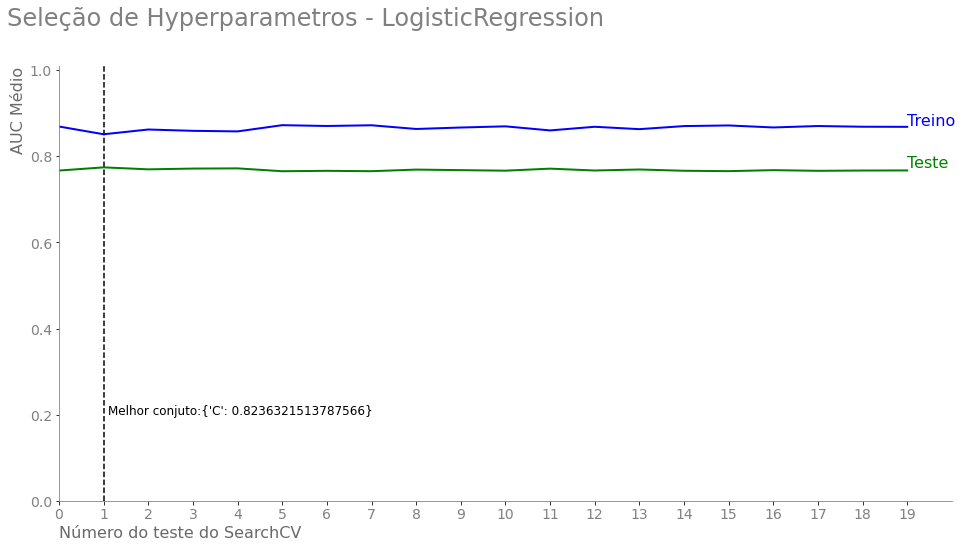

In [61]:
plota_treino_teste_auc('Seleção de Hyperparametros - LogisticRegression', 
                       resultados['media_teste'],
                       resultados['media_treino'],
                       resultados['rank_test_score'],
                       melhores_hyperparametros)

> Neste gráfico temos o valor médio de AUC obtido pelo CrossValidation para dados de **Treino** e **Teste**. O Melhor Seleção de Hyperparametro foi C = **0.82**

## 4.2) Arvore de decissão



melhores hyperparametros : {'max_depth': 3, 'criterion': 'entropy'}
Melhor modelo            : DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [63]:
parameters = {'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 5),
              'max_leaf_nodes'  : np.arange(2, 5)
             }
modelo = DecisionTreeClassifier()

resultados, melhor_modelo_arvore, melhores_hyperparametros  = roda_modelo_cv_randomized_search_cv(modelo,
                                                                                                  x_cv,
                                                                                                  y_cv,
                                                                                                  parameters,
                                                                                                  n_splits=5,
                                                                                                  n_repeats=10,
                                                                                                  n_iter=20,
                                                                                                  seed=14715)

resultados_treinamento(resultados, melhor_modelo_arvore, melhores_hyperparametros, n = 10)

Fitting 50 folds for each of 20 candidates, totalling 1000 fits
melhores hyperparametros : {'min_samples_leaf': 1, 'max_leaf_nodes': 4, 'max_depth': 12, 'criterion': 'gini'}
Melhor modelo            : DecisionTreeClassifier(max_depth=12, max_leaf_nodes=4)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'min_samples_leaf': 4, 'max_leaf_nodes': 3, '...",0.627843,0.729790,0.054147,0.015137,0.008734,0.000912,0.006356,0.000843,13
1,"{'min_samples_leaf': 1, 'max_leaf_nodes': 4, '...",0.671679,0.774202,0.052613,0.012517,0.008475,0.001187,0.006636,0.001144,1
2,"{'min_samples_leaf': 2, 'max_leaf_nodes': 3, '...",0.628109,0.729790,0.054253,0.015137,0.008914,0.000821,0.006416,0.000918,11
3,"{'min_samples_leaf': 2, 'max_leaf_nodes': 3, '...",0.631824,0.730956,0.053579,0.012870,0.007955,0.002198,0.006756,0.002880,8
4,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.575767,0.653939,0.048244,0.016604,0.006896,0.000754,0.006017,0.000812,14
5,"{'min_samples_leaf': 4, 'max_leaf_nodes': 3, '...",0.632090,0.730956,0.053667,0.012870,0.008175,0.001570,0.006776,0.001153,5
6,"{'min_samples_leaf': 1, 'max_leaf_nodes': 3, '...",0.632090,0.730956,0.053667,0.012870,0.007375,0.000718,0.005976,0.000706,5
7,"{'min_samples_leaf': 4, 'max_leaf_nodes': 4, '...",0.669367,0.776521,0.055082,0.012253,0.009514,0.001359,0.006417,0.001078,2
8,"{'min_samples_leaf': 2, 'max_leaf_nodes': 3, '...",0.628109,0.729790,0.054253,0.015137,0.007942,0.000905,0.006216,0.000945,11
9,"{'min_samples_leaf': 3, 'max_leaf_nodes': 4, '...",0.669113,0.776521,0.055043,0.012253,0.009014,0.000706,0.006137,0.000800,4


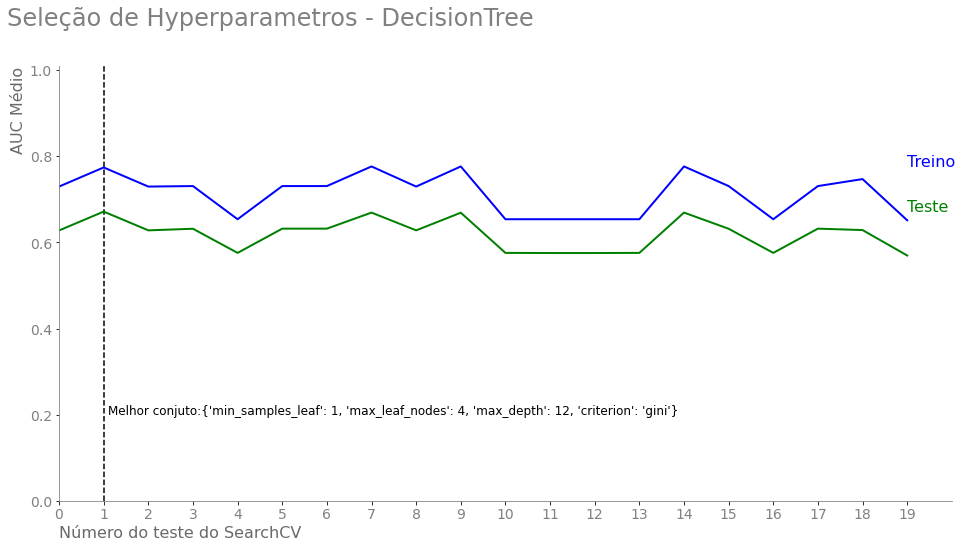

In [64]:
plota_treino_teste_auc('Seleção de Hyperparametros - DecisionTree', 
                       resultados['media_teste'],
                       resultados['media_treino'],
                       resultados['rank_test_score'],
                       melhores_hyperparametros)

## 4.2) Avaliando o melhor modelo

> Agora vamos avaliar o melhor modelo encontrado utilizando o dados de validação.

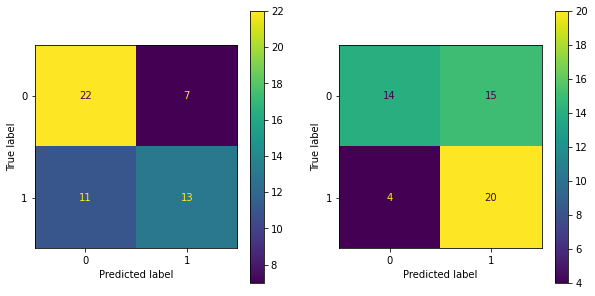

In [70]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

plot_confusion_matrix(melhor_modelo_lr    , x_val, y_val, ax=ax0)
plot_confusion_matrix(melhor_modelo_arvore, x_val, y_val, ax=ax1)

In [87]:
(tn, fp), (fn, tp) = confusion_matrix(y_val, melhor_modelo.predict(x_val))

In [88]:
print(tn, fp, fn, tp)

22 7 9 15


NameError: name 'melhor_modelo_lr' is not defined

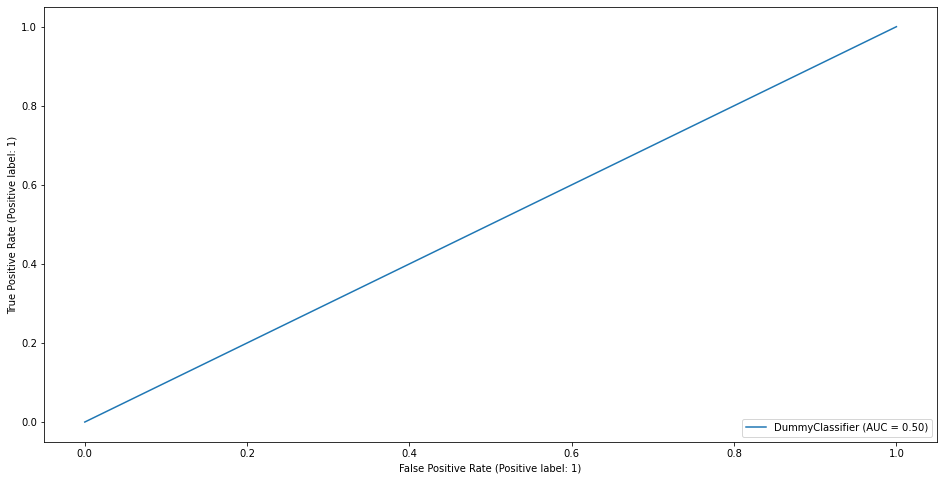

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
melhor_modelo_dummy
ax = plot_roc_curve(melhor_modelo_dummy    , x_val, y_val, ax = ax) 
ax = plot_roc_curve(melhor_modelo_lr    , x_val, y_val, ax = ax) 
ax = plot_roc_curve(melhor_modelo_arvore, x_cv, y_cv, ax = ax) 
ax.plot([0, 1], [0, 1], color = "red", ls ='--')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()